In [26]:
# Import standard libraries
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import random
import numpy as np
import yfinance as yf # ticker data 
from pandas_datareader import data as pdr # market proxy and treasury rates data
import datetime as dt
from numpy import nan
from time import sleep
import concurrent.futures
from functools import reduce
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import scipy 
import time

In [55]:
# Fetch historical price data for the desired asset using 'yfinance'
ticker = "NVDA"  # Example ticker symbol for Nvidia Inc.
start_date = "2018-01-01"  # Start date for historical data
end_date = "2022-12-31"  # End date for historical data

data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]
returns = data.pct_change().dropna()  # Calculate the returns

[*********************100%***********************]  1 of 1 completed


In [56]:
# Calculate the portfolio value for each day based on the returns:
initial_portfolio_value = 1000000  # Example initial portfolio value

portfolio_values = (1 + returns).cumprod() * initial_portfolio_value

print(portfolio_values)

Date
2018-01-03    1.065814e+06
2018-01-04    1.071432e+06
2018-01-05    1.080512e+06
2018-01-08    1.113619e+06
2018-01-09    1.113318e+06
                  ...     
2022-12-23    3.082214e+06
2022-12-27    2.862287e+06
2022-12-28    2.845058e+06
2022-12-29    2.959987e+06
2022-12-30    2.962217e+06
Name: Adj Close, Length: 1258, dtype: float64


In [57]:
# Determine the confidence level and desired holding period for the Expected Shortfall calculation:
confidence_level = 0.95  # Example confidence level (e.g., 95%)
holding_period = 10  # Example holding period in days

In [58]:
# Determine the number of observations for the holding period:
num_observations = len(portfolio_values) - holding_period

print(num_observations)

1248


In [59]:
# Sort the portfolio values in ascending order:
sorted_values = np.sort(portfolio_values)

print(portfolio_values)
print(sorted_values)

Date
2018-01-03    1.065814e+06
2018-01-04    1.071432e+06
2018-01-05    1.080512e+06
2018-01-08    1.113619e+06
2018-01-09    1.113318e+06
                  ...     
2022-12-23    3.082214e+06
2022-12-27    2.862287e+06
2022-12-28    2.845058e+06
2022-12-29    2.959987e+06
2022-12-30    2.962217e+06
Name: Adj Close, Length: 1258, dtype: float64
[ 639250.57083726  643828.01977593  651775.88745646 ... 6616335.94637401
 6678903.51601105 6758074.67314046]


In [63]:
# Calculate the VaR (Value at Risk) at the desired confidence level:
var_index = int(num_observations * (1 - confidence_level))
var = sorted_values[var_index]

print(f"VaR at {confidence_level * 100:.2f}% confidence level: {var:.2f}")

VaR at 95.00% confidence level: 759965.81


In [64]:
# Calculate the ES (Expected Shortfall) as the average of all portfolio values that are below the VaR:
es = sorted_values[:var_index].mean()
print(f"Expected Shortfall at {confidence_level * 100:.2f}% confidence level: {es:.2f}")

Expected Shortfall at 95.00% confidence level: 719974.21


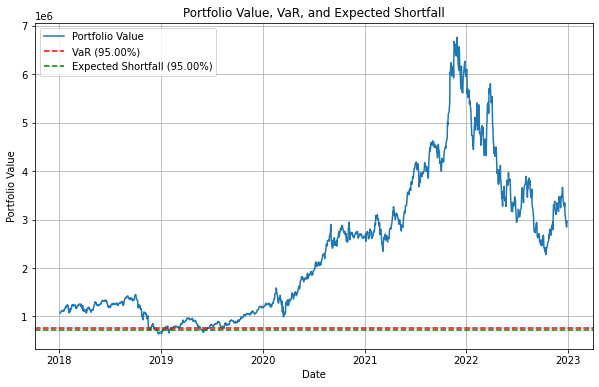

In [68]:
# Plotting the portfolio values and VaR threshold
plt.figure(figsize=(10, 6))
plt.plot(portfolio_values.index, portfolio_values, label="Portfolio Value")
plt.axhline(var, color="r", linestyle="--", label=f"VaR ({confidence_level * 100:.2f}%)")
plt.axhline(es, color="g", linestyle="--", label=f"Expected Shortfall ({confidence_level * 100:.2f}%)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value, VaR, and Expected Shortfall")
plt.legend()
plt.grid(True)
plt.show()